In [3]:
from openeye.oechem import *
from openeye.oedepict import *
import oenotebook as oenb
from IPython.display import display
import os
smile = "c1ccccc1"
file = "./targets.ism"

Query molecule:


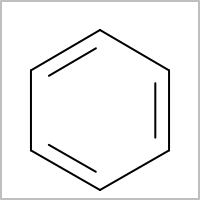

In [4]:
qmol = OEGraphMol()
OEParseSmiles(qmol, smile)
print ("Query molecule:")
display(oenb.draw_mol(qmol))
ss = OESubSearch(smile)
data = oenb.read_file_to_dataframe(file)
data["Sub Structure Search Hits"] = data.Molecule.apply(ss.Match)

In [5]:
data 

,Molecule,Sub Structure Search Hits
0,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
1,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
2,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
3,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
4,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
5,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
6,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
7,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
8,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
9,<openeye.oechem.OEMol; proxy of <Swig Object o...,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...


In [6]:
data = data.drop("Molecule", 1)
data

,Sub Structure Search Hits
0,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
1,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
2,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
3,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
4,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
5,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
6,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
7,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
8,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...
9,<openeye.oechem.OEMatchBaseIter; proxy of <Swi...


In [12]:
def DepictMoleculesWithSubstructureMatches(molecule,smile = "c1ccccc1" ):
    width, height = 400.0, 400.0
    opts = OE2DMolDisplayOptions(width, height, OEScale_AutoScale)
    image = OEImage(width, height)
    colors = OEGetContrastColors()
    highlight = OEHighlightOverlayByBallAndStick(colors)
    borderpen = OEPen(OEWhite, OELightGrey, OEFill_Off, 1.0)
    mol = GetOEGraphMol(molecule)
    OEPrepareDepiction(mol)
    ss = OESubSearch(smile)
    disp = OE2DMolDisplay(mol, opts)
    OEAddHighlightOverlay(disp, highlight, ss.Match(mol, True))
    OERenderMolecule(image, disp)
    OEDrawBorder(image, borderpen)
    display(oenb.draw_oeimage(image))
    return 0

In [13]:
data["Molecule Highlights"] = data.apply(DepictMoleculesWithSubstructureMatches)
oenb.render_dataframe(data)

NameError: ("name 'GetOEGraphMol' is not defined", 'occurred at index Sub Structure Search Hits')

### Substructure searching with pandas

In [24]:
#calling the function with the widget
from IPython.html import widgets
from ipywidgets import interactive
from IPython.display import Image, HTML, display

/Users/dariabalatsky/anaconda/envs/py34/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [25]:
w = interactive(MainSubstructure, file = widgets.Text(), smile = widgets.Text())
display(w)

Cannot open target input file!
